In [14]:
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

# 1 (c)

# 

In [2]:
def f1(xn, r):
    xn_plus_1 = np.cos(r*xn)**2
    return xn_plus_1

def f1dx(x_list, r):
    dfdx = -2*r*np.cos(r*x_list)*np.sin(r*x_list)
    return dfdx


In [3]:
n = 500

k = 1000
x0 = 0.5
r_list = np.linspace(0, 4, n)
lyap_exp_list = np.zeros(n)
xn = x0
x_list = np.zeros(k)

for i in range(n):
    for j in range(k):
        xn = f1(xn, r_list[i])
        x_list[j] = xn 

    lyap_exp_list[i] = np.sum(np.log(np.abs(f1dx(x_list, r_list[i]))))/k


C:\Users\aaron\AppData\Local\Temp\ipykernel_14352\981550120.py:15: RuntimeWarning: divide by zero encountered in log
  lyap_exp_list[i] = np.sum(np.log(np.abs(f1dx(x_list, r_list[i]))))/k


Text(0.5, 1.0, 'Lyanpunov Exponent vs r')

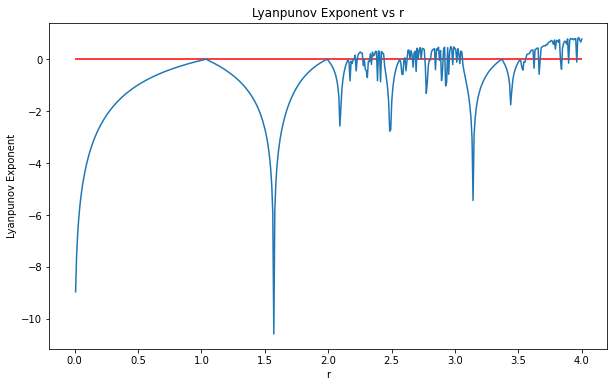

In [4]:
plt.figure(figsize=(10,6))
plt.hlines(y=0, xmin=0, xmax=4, colors='red')
plt.plot(r_list, lyap_exp_list)
plt.plot(lyap_exp_list=0, xmin=0, xmax=20,  color='r', linestyle='-')
plt.xlabel('r')
plt.ylabel('Lyanpunov Exponent')
plt.title('Lyanpunov Exponent vs r')



# 2(b) Intermittency

In [5]:
def f2(xn, r):
    xn_plus_1 = (r + xn - xn**2)/(1 + xn**3)
    return xn_plus_1



In [6]:
n = 1000
x_list = np.zeros(n)
x0 = 0.1
r = -0.1

x_list[0] = x0

for i in range(n-1):
    x_list[i+1] = f2(x_list[i], r)




(-50.0, 50.0)

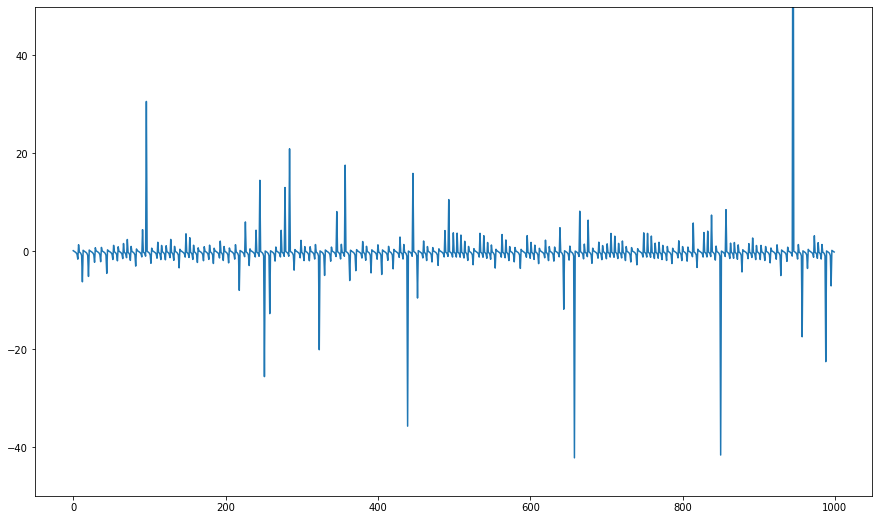

In [7]:
plt.figure(figsize=(15,9))
plt.plot(x_list)
#plt.xlim(-5, 5)
plt.ylim(-50, 50)

(-10.0, 10.0)

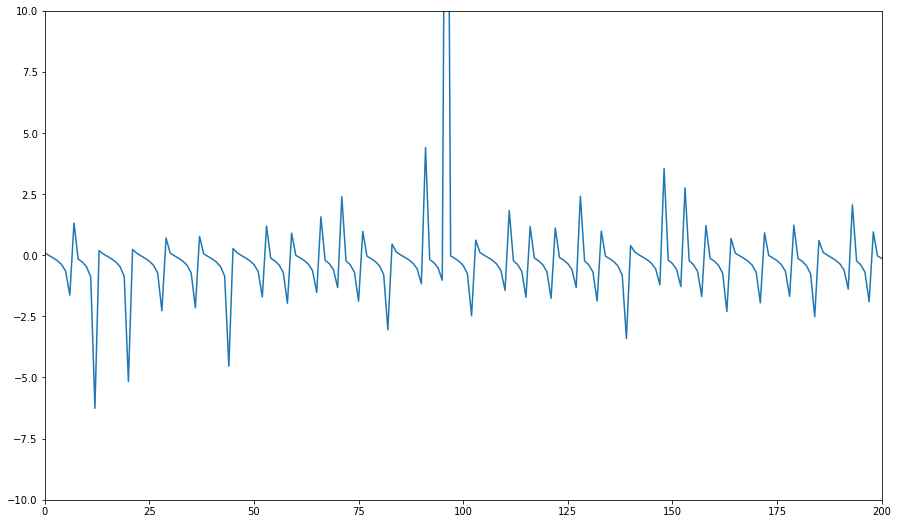

In [8]:
plt.figure(figsize=(15,9))
plt.plot(x_list)
plt.xlim(0, 200)
plt.ylim(-10, 10)

### We can see the almost oscilatory behaviour, dipping below and above the critical equilibrim point which is x = 0 when r = 0. This is intermitancy. 

# 2(c) Lyapunov Exponent 

In [9]:
def f2dx(xn, r):
    numerator = (1+xn**3)*(1 - 2*xn) - (r + xn - xn**2)*3*xn**2
    denominator = (1+xn**3)**2
    dfdx = numerator/denominator
    return dfdx

In [10]:

k = 1000
x_list = np.zeros(k)
x0 = 0.1
r = -0.1

x_list[0] = x0

for i in range(k-1):
    x_list[i+1] = f2(x_list[i], r)

lyap_exp = np.sum(np.log(np.abs(f1dx(x_list, r))))/k

print(lyap_exp)

-4.882403807768258


### For k = 1000 we get a Lyapunov exponent of $\lambda = -4.882$ meaning it is not chaotic.

# 3(c) Lorenz equations

In [16]:
def lorenz_equation(t, x_arr, rho):
    sigma = 10
    beta = 8/3
    dx = sigma * (x_arr[1] - x_arr[0])
    dy = rho * x_arr[0] - x_arr[1] - x_arr[0] * x_arr[2]
    dz = -beta * x_arr[2] + x_arr[0] * x_arr[1]
    return np.array([dx, dy, dz])

In [19]:
def plot_lorenz(rho = 28.0):

    initial_conditions = [0.1, 0.0, 0.0]  # Initial values of (x, y, z)
    t_span = (0, 100)  # Time span for integration

    # Integrate the Lorenz equation using solve_ivp
    sol = solve_ivp(lorenz_equation, t_span, initial_conditions, args=(rho,), dense_output=True)

    # Time values for plotting
    t_values = np.linspace(t_span[0], t_span[1], 10000)

    # Evaluate the solution at time points
    solution_points = sol.sol(t_values)

    # Create a 3D plot
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(solution_points[0], solution_points[1], solution_points[2], lw=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Lorenz Attractor (rho={})'.format(rho))

    plt.show()

### What we would expect is that we would observe chaos at $\rho = 28$, for the plots below it seems as though we observe it at $\rho = 28$ but what we would likely see is that the lyapunov exponents are still negative meaning it is not actually chaotic.

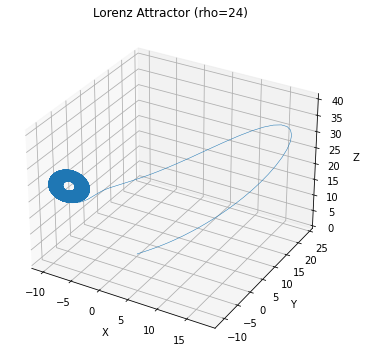

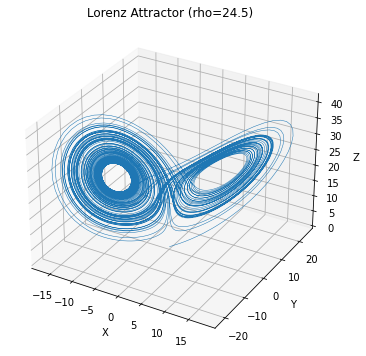

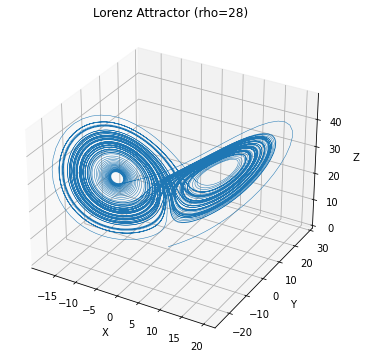

In [20]:
plot_lorenz(24)
plot_lorenz(24.5)
plot_lorenz(28)